<a href="https://colab.research.google.com/github/conanak/Crawl-data-from-Amazon/blob/main/crawldata.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Crawl data book

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import re
import time
from datetime import datetime
import matplotlib.dates as mdates
import matplotlib.ticker as ticker
from urllib.request import urlopen
from bs4 import BeautifulSoup
import requests

sns.set()

In [ ]:
PATH='/content/drive/MyDriver/Codecolab/crawldata'

Crawl Data from Amazon book

In [ ]:
url_amazon = 'https://www.amazon.com/best-sellers-books-Amazon'

In [ ]:
amazon = requests.get(url_amazon).content
amazon

b'<!doctype html><html><head><meta charset="utf-8"><meta http-equiv="x-ua-compatible" content="ie=edge"><meta name="viewport" content="width=device-width, initial-scale=1, shrink-to-fit=no"><title>Amazon.com Page Not Found</title><style>html,body{padding:0;margin:0}img{border:0}#a,#b{background:#232f3e;padding:11px;height:35px}#c{position:absolute;left:22px;top:12px}#e{position:relative;max-width:800px;padding-right:40px;margin-left:171px}#f,#g{height:35px;border:0;font-size:1em}#f{width:100%;margin:0;padding:0 10px;border-radius:4px 0 0 4px}#g{cursor:pointer;background:#febd69;font-weight:bold;border-radius:0 4px 4px 0;-webkit-appearance:none;position:absolute;top:0;right:0;padding:0 12px}@media(max-width:500px){#e{margin-left:0}#b{padding:55px 10px 10px}#c{left:6px}}#h{text-align:center;margin:30px 0}#h img{max-width:90%}#d{display:none}#d[src]{display:inline}</style></head><body><form id="b" accept-charset="utf-8" action="/s" method="GET" role="search"><a href="/"><img id="c" src="h

In [ ]:
soup_amazon = BeautifulSoup(amazon, 'lxml')
print(soup_amazon)

<!DOCTYPE html>
<html><head><meta charset="utf-8"/><meta content="ie=edge" http-equiv="x-ua-compatible"/><meta content="width=device-width, initial-scale=1, shrink-to-fit=no" name="viewport"/><title>Amazon.com Page Not Found</title><style>html,body{padding:0;margin:0}img{border:0}#a,#b{background:#232f3e;padding:11px;height:35px}#c{position:absolute;left:22px;top:12px}#e{position:relative;max-width:800px;padding-right:40px;margin-left:171px}#f,#g{height:35px;border:0;font-size:1em}#f{width:100%;margin:0;padding:0 10px;border-radius:4px 0 0 4px}#g{cursor:pointer;background:#febd69;font-weight:bold;border-radius:0 4px 4px 0;-webkit-appearance:none;position:absolute;top:0;right:0;padding:0 12px}@media(max-width:500px){#e{margin-left:0}#b{padding:55px 10px 10px}#c{left:6px}}#h{text-align:center;margin:30px 0}#h img{max-width:90%}#d{display:none}#d[src]{display:inline}</style></head><body><form accept-charset="utf-8" action="/s" id="b" method="GET" role="search"><a href="/"><img alt="Amazon

create list url page

In [ ]:
no_pages = 50

def get_data(url, pageNo):
    headers = {
        "User-Agent": "Mozilla/5.0 (Windows NT 10.0; Win64; x64; rv:66.0) Gecko/20100101 Firefox/66.0",
        "Accept-Encoding": "gzip, deflate",
        "Accept": "text/html,application/xhtml+xml,application/xml;q=0.9,*/*;q=0.8",
        "DNT": "1",
        "Connection": "close",
        "Upgrade-Insecure-Requests": "1"
    }

    full_url = f'{url}?_encoding=UTF8&pg={pageNo}'
    r = requests.get(full_url, headers=headers)
    content = r.content
    soup = BeautifulSoup(content, 'lxml')

    alls = []
    for d in soup.findAll('div', attrs={'class':'zg-grid-general-faceout'}):
        name = d.find('div', attrs={'class': '_cDEzb_p13n-sc-css-line-clamp-1_1Fn1y'})
        author = d.find('div', attrs={'class': 'a-row a-size-small'})
        rating = d.find('span', attrs={'class':'a-icon-alt'})
        users_rated = d.find('span', attrs={'class':'a-size-small'})
        price = d.find('span', attrs={'class':'_cDEzb_p13n-sc-price_3mJ9Z'})

        all1 = []

        all1.append(name.text.strip() if name else "unknown-product")
        all1.append(author.text.strip() if author else "0")

        if rating:
            rating_text = rating.text
            numeric_rating = rating_text.split()[0]
            all1.append(numeric_rating)
        else:
            all1.append("0")

        all1.append(users_rated.text.split()[0] if users_rated else "0")
        all1.append(price.text if price else "0")

        alls.append(all1)

    return alls

def scrape_amazon_categories(categories, no_pages=50):
    all_results = []

    for category in categories:
        print(f"Scraping {category['name']}...")
        results = []
        for i in range(1, no_pages + 1):
            results.extend(get_data(category['url'], i))

        df = pd.DataFrame(results, columns=['Book Name', 'Author', 'Rating', 'Customers_Rated', 'Price'])
        df['Category'] = category['name']
        all_results.append(df)

    final_df = pd.concat(all_results, ignore_index=True)
    final_df.to_csv('amazon_products_multi_category.csv', index=False, encoding='utf-8')
    print("Data has been scraped and saved to amazon_products_multi_category.csv")

# Define the categories you want to scrape
categories = [
    {
        "name": "Best Sellers",
        "url": "https://www.amazon.com/best-sellers-books-Amazon/zgbs/books"
    },
    {
        "name": "New Releases",
        "url": "https://www.amazon.com/gp/new-releases/books"
    },
    {
        "name": "New ",
        "url": "https://www.amazon.com/s?i=stripbooks&srs=17143709011&bbn=17143709011&rh=n%3A283155&dc&ds=v1%3AZgBI8zlPeEJsf35kR%2Fkf3s5DAzdS49oFXAXMU%2BU7e34&qid=1726150955&ref=sr_ex_n_1"
    },


    # Add more categories as needed
]

# Run the scraper
scrape_amazon_categories(categories)

Scraping Best Sellers...
Scraping New Releases...
Scraping New ...
Data has been scraped and saved to amazon_products_multi_category.csv


Reading CSV File

In [ ]:
# Đọc dữ liệu danh sách các sách được đã được crawl
df = pd.read_csv("amazon_products_multi_category.csv")


In [ ]:
df.shape


(120, 6)

(120, 6)

In [ ]:
(100, 5)


(100, 5)

(100, 5)

In [ ]:
df.head(61)


,Book Name,Author,Rating,Customers_Rated,Price,Category
0,Good Energy: The Surprising Connection Between...,Casey Means MD,4.5,"1,119",$22.40,Best Sellers
1,Who Could Ever Love You: A Family Memoir,Mary L. Trump PhD,4.1,11,$22.05,Best Sellers
2,It Starts with Us: A Novel (It Ends with Us),Colleen Hoover,4.5,"187,697",$10.98,Best Sellers
3,Don't Believe Everything You Think: Why Your T...,Joseph Nguyen,4.6,"11,831",$15.38,Best Sellers
4,Spooky Cutie: Coloring Book for Adults and Tee...,Coco Wyo,4.8,476,$7.99,Best Sellers
...,...,...,...,...,...,...
56,Rand McNally Large Scale Road Atlas 2025,Rand McNally,4.7,"1,381",$19.06,Best Sellers
57,Dav Pilkey,Dav Pilkey,0.0,Hardcover,$10.49,Best Sellers
58,How to Win Friends & Influence People (Dale Ca...,Dale Carnegie,4.7,"33,153",$10.29,Best Sellers
59,The Psychology of Money: Timeless lessons on w...,Morgan Housel,4.7,"54,802",$10.99,Best Sellers


,Book Name,Author,Rating,Customers_Rated,Price,Category
0,Good Energy: The Surprising Connection Between...,Casey Means MD,4.5,"1,119",$22.40,Best Sellers
1,Who Could Ever Love You: A Family Memoir,Mary L. Trump PhD,4.1,11,$22.05,Best Sellers
2,It Starts with Us: A Novel (It Ends with Us),Colleen Hoover,4.5,"187,697",$10.98,Best Sellers
3,Don't Believe Everything You Think: Why Your T...,Joseph Nguyen,4.6,"11,831",$15.38,Best Sellers
4,Spooky Cutie: Coloring Book for Adults and Tee...,Coco Wyo,4.8,476,$7.99,Best Sellers
...,...,...,...,...,...,...
56,Rand McNally Large Scale Road Atlas 2025,Rand McNally,4.7,"1,381",$19.06,Best Sellers
57,Dav Pilkey,Dav Pilkey,0.0,Hardcover,$10.49,Best Sellers
58,How to Win Friends & Influence People (Dale Ca...,Dale Carnegie,4.7,"33,153",$10.29,Best Sellers
59,The Psychology of Money: Timeless lessons on w...,Morgan Housel,4.7,"54,802",$10.99,Best Sellers


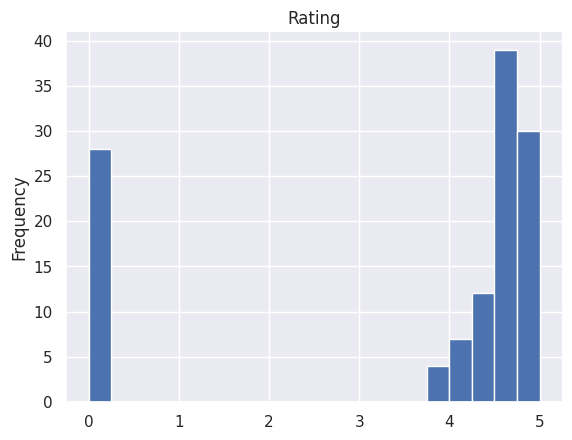

In [ ]:
# đồ thi rating
from matplotlib import pyplot as plt
df['Rating'].plot(kind='hist', bins=20, title='Rating')
plt.gca().spines[['top', 'right',]].set_visible(False)

Crawl list book in page

In [ ]:
print(df['Rating'].dtype)

float64
